In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("customer_churn_large_dataset.csv")
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.tail()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [5]:
df_info = {
    'Number of Rows': df.shape[0],
    'Number of Columns': df.shape[1],
    'Columns': df.columns.tolist(),
    'Data Types': df.dtypes.tolist(),
    'Missing Values': df.isnull().sum().tolist(),
    'Unique Values': df.nunique().tolist(),
    'Data Duplicates' : df.duplicated().sum().tolist(),
}

In [6]:
Data_overview=pd.DataFrame(df_info)
Data_overview

,Number of Rows,Number of Columns,Columns,Data Types,Missing Values,Unique Values,Data Duplicates
0,100000,9,CustomerID,int64,0,100000,0
1,100000,9,Name,object,0,100000,0
2,100000,9,Age,int64,0,53,0
3,100000,9,Gender,object,0,2,0
4,100000,9,Location,object,0,5,0
5,100000,9,Subscription_Length_Months,int64,0,24,0
6,100000,9,Monthly_Bill,float64,0,7001,0
7,100000,9,Total_Usage_GB,int64,0,451,0
8,100000,9,Churn,int64,0,2,0


In [7]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
corr=df.corr()
corr

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


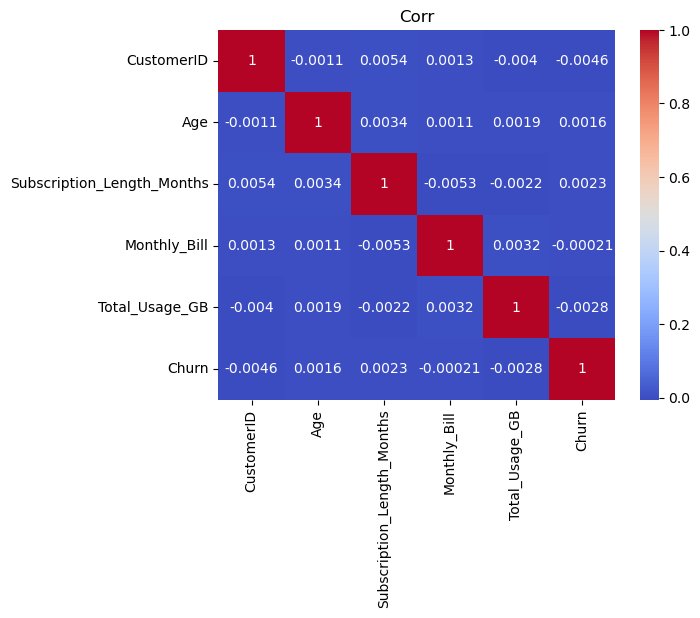

In [9]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Corr')
plt.show()

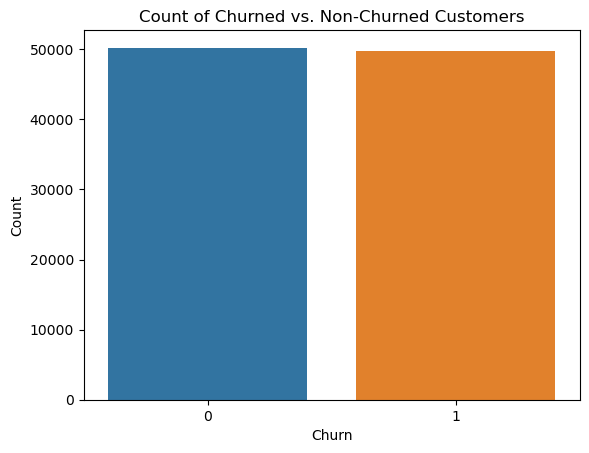

In [10]:
sns.countplot(x='Churn', data=df)
plt.title('Count of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

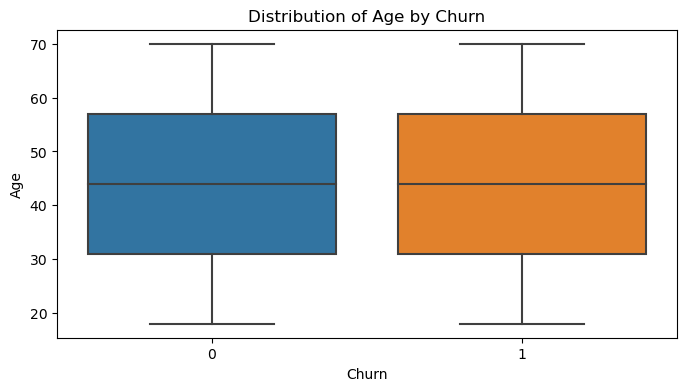

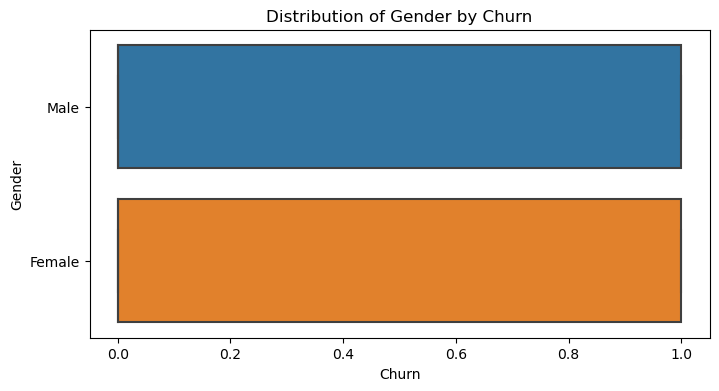

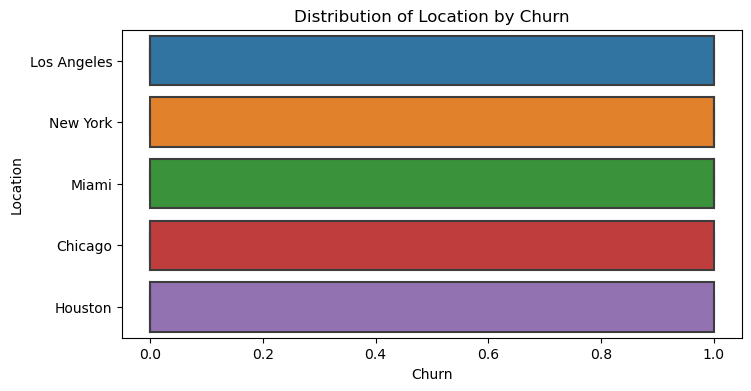

In [11]:
numeric_features = ['Age', 'Gender', 'Location']
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

In [12]:
dt=df.drop(df.columns[[0,1]],axis=1)
dt

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,Male,Houston,23,55.13,226,1
99996,62,Female,New York,19,61.65,351,0
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dt['Gender'] = label_encoder.fit_transform(df['Gender'])
dt['Location'] = label_encoder.fit_transform(df['Location'])
dt

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,1,2,17,73.36,236,0
1,62,0,4,1,48.76,172,0
2,24,0,2,5,85.47,460,0
3,36,0,3,3,97.94,297,1
4,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
99995,33,1,1,23,55.13,226,1
99996,62,0,4,19,61.65,351,0
99997,64,1,0,17,96.11,251,1
99998,51,0,4,20,49.25,434,1


In [14]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X = dt.drop('Churn', axis=1)
y = dt['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Initialized,Fit and transform the scaler on the training and testing data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)

Random Forest Metrics:
Accuracy: 0.49705
Precision: 0.49271998311880144
Recall: 0.47071867755266605
F1-Score: 0.4814681169132429


In [17]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.50225   0.49575   0.4933125 0.4960625 0.5031875]


In [18]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

print("Logistic Regression Model Metrics:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1-score:", lr_f1)


Logistic Regression Model Metrics:
Accuracy: 0.50225
Precision: 0.4977596204533474
Recall: 0.38070758996068943
F1-score: 0.4314352618653264


In [19]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Use a subset of your data
subset_size = 1000  # Adjust this to a reasonable subset size
X_train_subset = X_train_scaled[:subset_size]
y_train_subset = y_train[:subset_size]

# Create the model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with parallel execution
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data subset
grid_search.fit(X_train_subset, y_train_subset)

# Get the best parameters
best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [20]:
import pickle

In [21]:
filename = ('model.churn')

In [22]:
pickle.dump(lr_model, open(filename, 'wb'))

In [23]:
load_model = pickle.load(open(filename, 'rb'))

In [24]:
load_model.score(X_test_scaled, y_test)

0.50225